# Introduction to Bayes Theorem

We can easily derieve Bayes Theorem from the defintion of conditional probability.

Defintion of Conditional Probability: The conditional probability of event $A$ given event $B$, denoted $P(A|B)$ is defined as

$$
P(A|B) = \frac{P(A \cap B )}{P(B)}.
$$

Similarily, the conditional probability of B given A is given as 
$$
P(B|A) = \frac{P(B \cap A)}{P(A)}.
$$

Using this we can conclude that the $P(B \cap A)$ is given by
$$
 P(B \cap A)= P(A) P(B|A) = P(B) P(A|B).
$$

Now we can express the $P(B|A)$ as,
$$
P(B|A) = \frac{P(B) P(A|B)}{P(A)}.
$$

If B is partitioned into the events $B_1, B_2, \ldots B_m$, then we can write $P(A)$ as
$$
P(A) = \sum_{i=1}^m P(B_i)P(A|B_i).
$$

Therefore, for each $j = 1,2, \ldots$,m the $P(B_j|A)$ is given by
$$
P(B_j|A) = \frac{P(B_j) P(A|B_j)}{\sum_{i=1}^m P(B_i)P(A|B_i)}.
$$


## Example Problem
Suppose A disease afflicts 0.1% individuals in a population. A test has been developed for this disease. An idividual with the disease will test positive for the disease 99% of the time, and an individual without the disease will test postive 1% of time. Suppose an individual is selected at random for this disease and tested. The test shows a positive result. What is the probability that this individual actually has the disease?

Let D be the event that the selected person has the disease.
Let A be the event that the selected person tests positive for the disease.

From the the problem we can deduce that $P(D) = 0.001$, $P(A|D) = 0.99$, and $P(A|D^C) = 0.01$. Since $P(D) = 0.001)$ we can conclude that $P(D^C) = 1-P(D) = 0.999)$. 

Therefore, 
$$
P(D|A) = \frac{P(D)P(A|D)}{P(D)P(A|D) + P(D^C)P(A|D^C)} = \frac{0.001*0.99}{0.001*0.99 + 0.999*0.01} \approx 0.0902.
$$

# Bernoulli Trials
A Bernoulli trial is trial in which there is exactly two possible outcomes, "success" and "failure". Defining the random variable, $X$ as $1$ is the Bernoulli trial is a "success" and $0$ if the Bernoulli trial is a "failure", the probability mass function of a bernoulli random variable is given by 

$$
f(x|\theta) = 
\begin{cases}
\theta^x (1-\theta)^{1-x} \hspace{5mm} & \mbox{for} \hspace{3mm} x \in \{0,1\}.\\
0 & \mbox{otherwise}\\
\end{cases}
$$

Alternatively, $f(x|\theta)$ can also be expressed as
$$
f(x|\theta) = 
\begin{cases} 
      \theta & \mbox{ for $x = 1$} \\
      1 - \theta & \mbox{ for $x = 0$ } \\
      0 & \mbox{otherwise}
   \end{cases}.
$$

## Flipping the Patriot's Superbowl Coin
Suppose the Patriots are accused of rigging a coin, and we are tasked with investigating the matter. 

Let's define the Bernoulli random variable $X$ as 
$$
X = \begin{cases} 
      1 & \textrm{if the coin shows heads} \\
      0 & \textrm{if the coin shows tails } \\
   \end{cases}.
$$

## Notation
$n$- the number of times we flip the coin   
$X_1, X_2, \ldots, X_n$- the independent, identically distributed (iid) resepective Bernoulli trial   
$Y = \sum_{i=1}^n X_i$   
$\theta$- the probability the coin shows Heads (i.e.the $P(X = 1)$ 

### Generate the data

In [1]:
import numpy as np
#Define parameter and sample size
theta , n = 0.5, 10

#Generate Data
x = np.random.binomial(1, theta, n)
print(x)

[1 1 0 1 0 0 0 0 1 0]


### Define the prior
Let's define the prior, $\pi(\theta)$ using a beta distribution.
$$
\pi(\theta) =
\begin{cases} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1} (1-\theta)^{\beta - 1}
& \textrm{for $\theta \in [0,1]$}\\
0 & \textrm{otherwise}
\end{cases}
$$

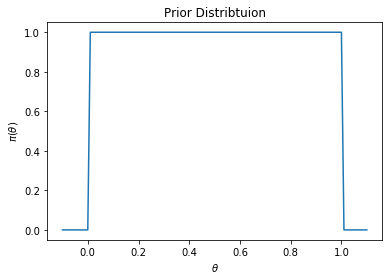

In [2]:
#Define hyperparameters
prior_alpha, prior_beta = 1,1

import matplotlib.pyplot as plt
from scipy.stats import beta

xgrid = np.arange(-0.1,1.1,0.01)
#Evaluate the prior over the grid
prior_of_xgrid = beta.pdf(xgrid, a = prior_alpha, b = prior_beta)

#Plot the prior distribution
plt.plot(xgrid, prior_of_xgrid)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta)$')
plt.title("Prior Distribtuion")
plt.show()


### Define the Likelihood
The likelihood of $\theta$ is the function $L(\theta)$ given by
$$
L(\theta|x) = \prod_{i = 1}^n f(x_i | \theta).
$$

In this case the likelihood is given by
$$
\begin{align}
L(\theta|x) &= \prod_{i=1}^n f(x_i|\theta) \\ 
 &= \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i}\\
 &= \theta^{\sum_{i=1}^n x_i}\hspace{2mm} (1-\theta)^{n - \sum_{i=1}^n x_i}\\
 &= \theta^{y}\hspace{2mm} (1-\theta)^{n - y}.
\end{align}
$$

NOTE: When the prior distribution and posterior distribution are of the same functional form, the prior distribution is called a conjugate prior for the likelihood function.

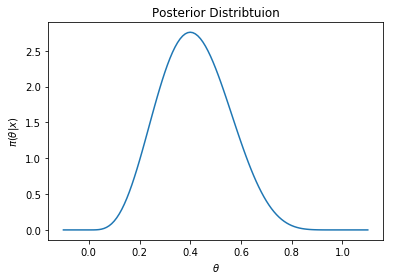

In [3]:
#Define Posterior hyperparameters
posterior_alpha = prior_alpha + x.sum()
posterior_beta = prior_beta + n - x.sum()

#Evaluate the postior over the grid
posterior_of_xgrid = beta.pdf(xgrid, a = posterior_alpha, b = posterior_beta)
#Plot the posterior
plt.plot(xgrid, posterior_of_xgrid)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta | x)$')
plt.title("Posterior Distribtuion")
plt.show()


# German Tank Problem

### Background
In WWII, Germany manufactured their tanks with consectuive serial numbers. The Allied Powers sought to exploit this to help them determine how many tanks Germany possessed. The problem can be defined as estimating the maximum of a discrete uniform distribution based on a sample without replacement.

#### Discrete Uniform Distribution
A random variable X is said to have the discrete uniform distribution if and only if the the probability mass function is given by
$$
P(X =x |n) = 
\begin{cases}
\frac{1}{n} & \textrm{for $x \in \{ a, a+1, \ldots b \} $ where $n = b - a +1$}\\
0 & \textrm{otherwise}\\
\end{cases}
$$

### Notation
$N$ is the maximum serial number  
$M$ is the maximum serial number in the sample  
$K$ is the number of tanks in the sample  
$n,m,$ and $k$ are a possible or observed value for each of the respective variables


### Bayesian view
#### Prior
Take prior distribution of $N$ given by
$$
P(N = n | k) = 
\begin{cases}
\frac{1}{\Omega - k} & \mbox{for $n \geq k$}\\
0 & \mbox{for $n < k$}
\end{cases}
$$

and the likelihood given by
$$
P(M = m|n,k) = 
\begin{cases}
\frac{\binom{m-1}{k-1}}{\binom{n}{k}} & \mbox{for $m \leq k$}\\.
0 & \mbox{otherwise}
\end{cases}
$$

#### Posterior 
The posterior distrubtion for $N$ by observing $k > 1$ tanks with maximum serial number $M$ is given by
$$
P(N = n \hspace{1mm}| \hspace{1mm} M=m, K=k)= 
\begin{cases}
0 & \textrm{if $n<k$}\\
\frac{k-1}{k} 
\frac{\binom{m-1}{k-1}}{\binom{n}{k}} & \textrm{if $n \geq k$}
\end{cases}.
$$

#### Posterior mean  and standard deviation
For $k>3$ the posterior mean $\mu$ and standard deviation $\sigma$ are given by
$$
\begin{align}
\mu &= \frac{(m-1)(k-1)}{k-2} \\
\sigma &= \sqrt{\frac{(m-1)(k-1)(m-k+1)}{(k-3)(k-2)^2}}
\end{align}
$$

## Example
Suppose we observe 4 tanks with the highest serial number being 64. Below is a python function for computing the posterior distribution.

In [4]:
from scipy.misc import comb

def eval_point(n):
    if n <m:
        return(0)
    else:
        numer = (k-1)/k *comb(m-1,k-1)
        denom = comb(n, k)
        return(numer/denom)

def posterior(n):
    list_eval_points = []
    for m in n:
        eval = eval_point(m)
        list_eval_points.append(eval)
    out = np.array(list_eval_points)
    return(out)    


In [5]:
#Define the parameters
m = 64
k = 4
N = np.array(range(1,201))

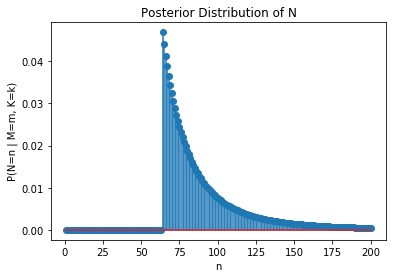

In [6]:
fig, ax = plt.subplots()
ax.stem(N, posterior(N))
plt.xlabel("n")
plt.ylabel("P(N=n | M=m, K=k)")
plt.title("Posterior Distribution of N")
plt.show()

## Results
Comparison of German records to statistical estimates shows that the statistical estimates were much more accurate then the intelligence estimates.
